# Sales Prediction Project Using Python


 **Introduction**               
For this project, I wanted to predict product sales using advertising data. The dataset includes how much was spent on TV, Radio, and Newspaper promotions, and the resulting Sales. I used Python and a linear regression model to analyze and predict sales.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


**Data Loading**         
I uploaded my dataset (Advertising.csv) and loaded it into a pandas DataFrame.

In [5]:
# Upload Advertising.csv to Colab (use the folder icon or files.upload)
df = pd.read_csv("Advertising.csv", index_col=0)
print(df.head())


      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


 **Data Exploration**            
I checked the basic stats and visualized relationships to understand the data better.

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


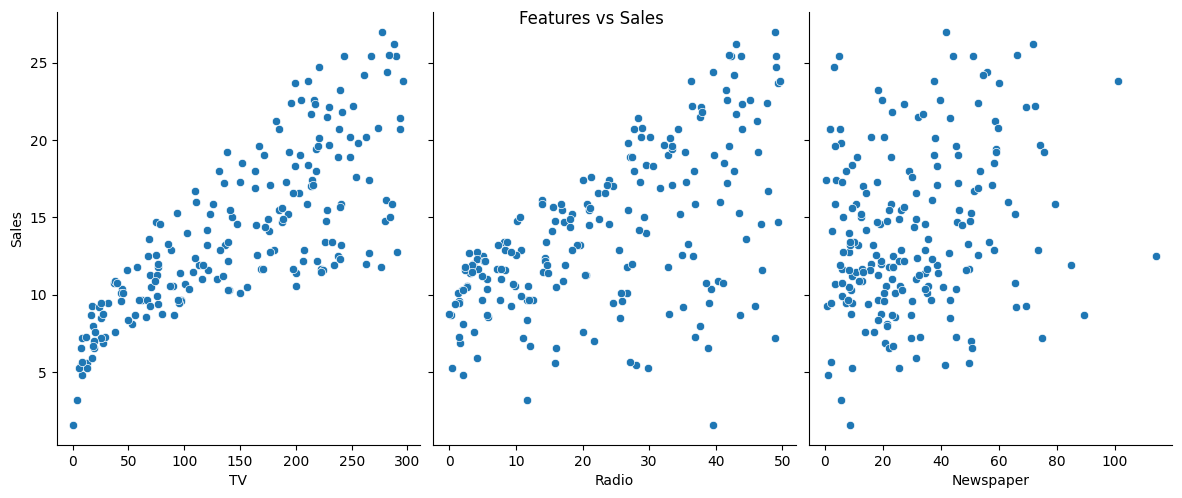

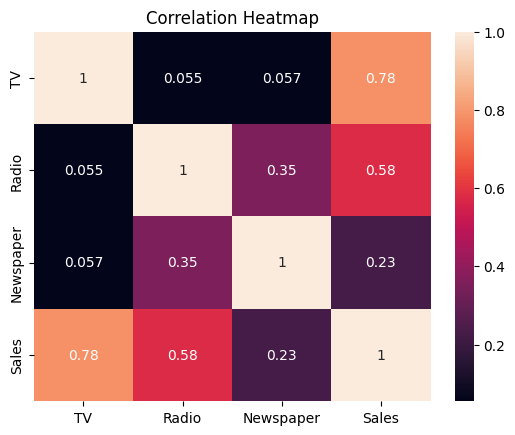

In [6]:
# Summary statistics and data info
print(df.describe())
print(df.info())

# Visualize TV, Radio, Newspaper vs Sales
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=5, aspect=0.8, kind='scatter')
plt.suptitle("Features vs Sales")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


**Preparing Data for Modeling**   
I selected my features (TV, Radio, Newspaper) and the target (Sales), then split the data for training and testing.

In [7]:
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Training the Model**        
I fit a linear regression model and checked its coefficients to see which advertising channel had the biggest impact.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


 **Model Evaluation**         
Next, I predicted sales on the test data and calculated how accurate my model was.

In [11]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
# Calculate RMSE by taking the square root of the MSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.899438024100912
RMSE: 1.78159966153345


**Results Visualization**       
I plotted the actual versus predicted sales to visually check the fit.

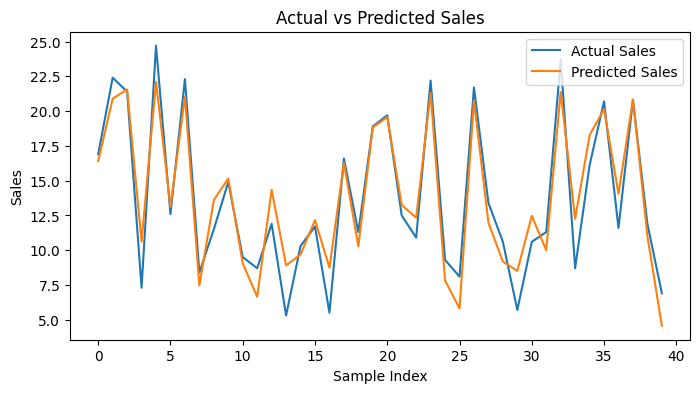

In [12]:
plt.figure(figsize=(8,4))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.show()


**Conclusion**             
I successfully built a regression model to estimate sales from advertising spend. I learned that TV and Radio had stronger effects than Newspaper. This project helped me practice practical data science steps: loading data, exploring, modeling, and evaluating predictions.